In [13]:
from tensorflow.keras.datasets import imdb
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tüm kelimeleri içeren IMDB veri setini yükle
(x_train, y_train), (x_test, y_test) = imdb.load_data()
# Eğitim ve test verilerini birleştir
X_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# İlk 30,000 örneği seç
X_30000 = X_all[:30000]
y_30000 = y_all[:30000]

# İstersen tekrar train-test ayırabilirsin
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_30000, y_30000, test_size=0.2, random_state=42)


# Kelime indekslerini al
word_index = imdb.get_word_index()

# İndeksleri kelimelere çevirmek için ters sözlük oluştur
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

# Yorumları metin haline çeviren yardımcı fonksiyon
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

# İlk 3 yorumu yazdır (ham ve metin haliyle)
for i in range(3):
    print(f"\n--- Yorum {i+1} ---")
    print("Etiket (0: negatif, 1: pozitif):", y_train[i])
    print("Ham indeks dizisi:", x_train[i])
    print("Metin hali:", decode_review(x_train[i]))



--- Yorum 1 ---
Etiket (0: negatif, 1: pozitif): 0
Ham indeks dizisi: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 1

In [5]:
import numpy as np
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

# 1. Veri yükle ve 30.000'e indir
(x_train, y_train), (x_test, y_test) = imdb.load_data()
X_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

X_30000 = X_all[:30000]
y_30000 = y_all[:30000]

X_train, X_test, y_train, y_test = train_test_split(X_30000, y_30000, test_size=0.2, random_state=42)

# 2. Kelime indeksleri ve ters sözlük oluştur
word_index = imdb.get_word_index()
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

# 3. İndeks dizilerini metin haline çevir
decoded_x_train = [decode_review(x) for x in X_train]
decoded_x_test = [decode_review(x) for x in X_test]

# 4. BERT tokenizer ve model hazırla
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)
bert_model.trainable = False  # Gerekirse True yapabilirsin

max_len = 64

def tokenize(texts):
    return tokenizer(
        texts,
        truncation=True,
        padding="max_length",
        max_length=max_len,
        return_tensors="tf"
    )

train_tokens = tokenize(decoded_x_train)
test_tokens = tokenize(decoded_x_test)

# Artık train_tokens ve test_tokens dict halinde ve TensorFlow tensör içeriyor
# Örnek:
print(train_tokens.keys())

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [7]:
def get_bert_embeddings(tokens, batch_size=32):
    embeddings = []
    for i in range(0, len(tokens['input_ids']), batch_size):
        batch = {
            key: val[i:i+batch_size]
            for key, val in tokens.items()
        }
        outputs = bert_model(batch)
        pooled_output = outputs.pooler_output  # [CLS] token çıktısı
        embeddings.append(pooled_output.numpy())
    return np.vstack(embeddings)

# Uygulama
train_embeddings = get_bert_embeddings(train_tokens, batch_size=32)
test_embeddings = get_bert_embeddings(test_tokens, batch_size=32)


In [8]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

# Girişler
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

# BERT'ten sequence output al
bert_outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
sequence_output = bert_outputs.last_hidden_state  # (batch_size, max_len, 768)

# LSTM katmanı
lstm_out = LSTM(128)(sequence_output)

# Dropout + Dense
x = Dropout(0.3)(lstm_out)
output = Dense(1, activation='sigmoid')(x)

# Model tanımı
model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(
    x={
        'input_ids': train_tokens['input_ids'],
        'attention_mask': train_tokens['attention_mask']
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_tokens['input_ids'],
            'attention_mask': test_tokens['attention_mask']
        },
        y_test
    ),
    epochs=10,
    batch_size=16
)


Epoch 1/10
1500/1500 [==============================] - 87s 58ms/step - loss: 0.4261 - accuracy: 0.7998 - val_loss: 0.4317 - val_accuracy: 0.7950
Epoch 2/10
1500/1500 [==============================] - 84s 56ms/step - loss: 0.4047 - accuracy: 0.8117 - val_loss: 0.4361 - val_accuracy: 0.7982
Epoch 3/10
1500/1500 [==============================] - 82s 55ms/step - loss: 0.3869 - accuracy: 0.8215 - val_loss: 0.4119 - val_accuracy: 0.8165
Epoch 4/10
1500/1500 [==============================] - 83s 55ms/step - loss: 0.3730 - accuracy: 0.8295 - val_loss: 0.3991 - val_accuracy: 0.8140
Epoch 5/10
1500/1500 [==============================] - 82s 55ms/step - loss: 0.3530 - accuracy: 0.8420 - val_loss: 0.4048 - val_accuracy: 0.8193
Epoch 6/10
1500/1500 [==============================] - 83s 55ms/step - loss: 0.3382 - accuracy: 0.8486 - val_loss: 0.4020 - val_accuracy: 0.8180
Epoch 7/10
1500/1500 [==============================] - 83s 55ms/step - loss: 0.3208 - accuracy: 0.8597 - val_loss: 0.4113 -

In [19]:
# Test verisi üzerinde başarı oranını (accuracy) hesapla
loss, accuracy = model.evaluate(
    x={'input_ids': test_tokens['input_ids'], 'attention_mask': test_tokens['attention_mask']},
    y=y_test,
    batch_size=32
)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


188/188 [==============================] - 17s 88ms/step - loss: 0.4385 - accuracy: 0.8152
Test Loss: 0.4385
Test Accuracy: 81.52%


In [17]:
def predict_sentiment(text):
    # Metni tokenleştir
    encoding = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=64,
        return_tensors="tf"
    )

    # Model tahmini (input_ids ve attention_mask veriliyor)
    prediction = model.predict({
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask']
    })

    # Tahmin sonucuna göre etiket belirle
    label = 1 if prediction[0][0] >= 0.5 else 0
    confidence = prediction[0][0]

    if label == 1:
        print(f"👍 Olumlu (Confidence: {confidence:.2f})")
    else:
        print(f"👎 Olumsuz (Confidence: {confidence:.2f})")


In [18]:
predict_sentiment("This movie was a complete waste of time. The acting was terrible and the plot made no sense.")

1/1 [==============================] - 4s 4s/step
👎 Olumsuz (Confidence: 0.01)


In [20]:
predict_sentiment("I absolutely loved this movie. The story was touching and the performances were amazing.")


1/1 [==============================] - 0s 97ms/step
👍 Olumlu (Confidence: 0.99)


In [21]:
predict_sentiment("This movie was an unforgettable experience with its brilliant storyline, compelling characters, stunning visuals, and emotional depth; every scene was crafted with such care and precision that I found myself completely immersed from beginning to end, feeling a wide range of emotions that left me both inspired and grateful for having watched something so beautifully made.")

1/1 [==============================] - 0s 110ms/step
👍 Olumlu (Confidence: 1.00)


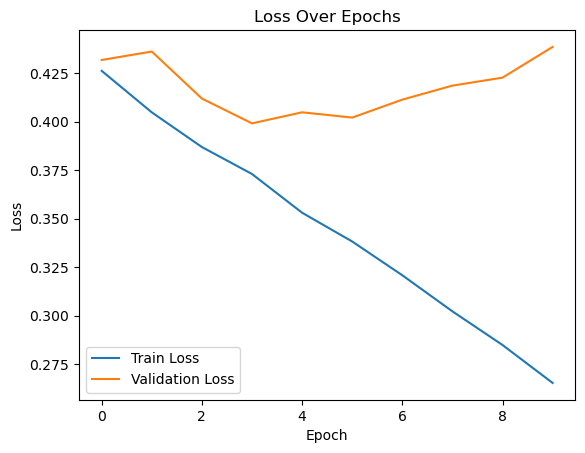

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.show()


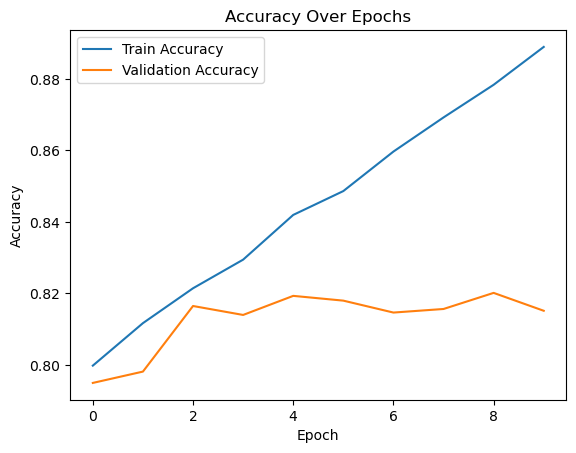

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()
plt.show()


188/188 [==============================] - 16s 86ms/step


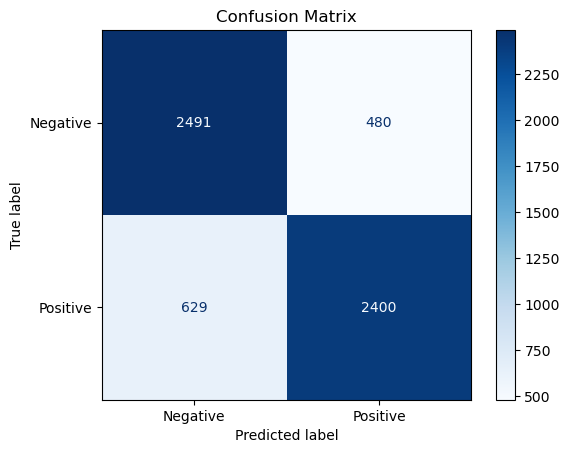

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict({'input_ids': test_tokens['input_ids'], 'attention_mask': test_tokens['attention_mask']})
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


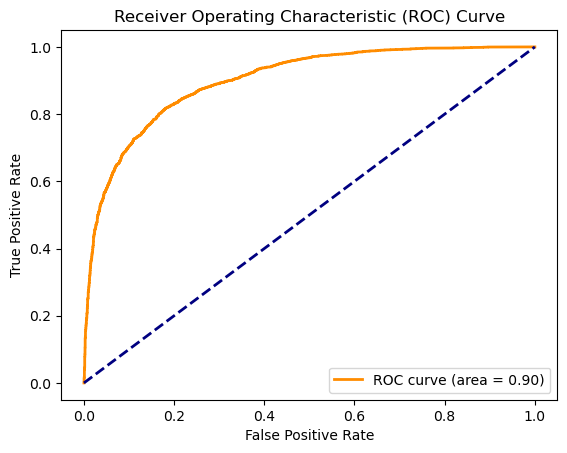

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


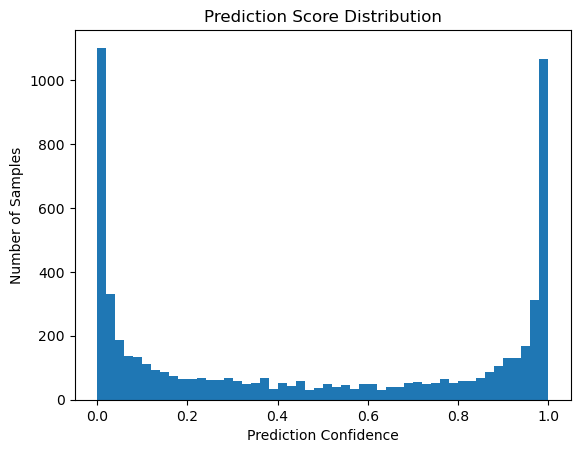

In [26]:
plt.hist(y_pred, bins=50)
plt.xlabel("Prediction Confidence")
plt.ylabel("Number of Samples")
plt.title("Prediction Score Distribution")
plt.show()
